In [1]:
import numpy as np
usr_file = r'.\work\ml-1m\users.dat'
with open(usr_file, 'r') as f:
    usr_data = f.readlines()
print('data size: ', len(usr_data))
print('data example: ', usr_data[0])    
print('data type: ', type(usr_data[0]))

data size:  6040
data example:  1::F::1::10::48067

data type:  <class 'str'>


In [2]:
# 性别转换为数字
def gender2num(gender):
    return 1 if gender == 'F' else 0

print("性别M用数字{}表示".format(gender2num('M')))
print("性别F用数字{}表示".format(gender2num('F')))

性别M用数字0表示
性别F用数字1表示


In [3]:
# 用户数据的字符串类型转换为数字类型
usr_info = {}
max_usr_id = 0
# 按行索引数据
for line in usr_data:
    # 去除每一行和数据无关的部分
    item = line.strip().split('::')
    # print(item)
    # 用户ID
    usr_id = int(item[0])
    usr_info[usr_id] = {'usr_id': usr_id,'gender': gender2num(item[1]), 'age': int(item[2]), 'job': int(item[3])}
    max_usr_id = max(max_usr_id, usr_id)
print('max_usr_id: ', max_usr_id)
print('usr_info[1]: ', usr_info[1])
print('usr_info[3]: ', usr_info[3])

max_usr_id:  6040
usr_info[1]:  {'usr_id': 1, 'gender': 1, 'age': 1, 'job': 10}
usr_info[3]:  {'usr_id': 3, 'gender': 0, 'age': 25, 'job': 15}


In [4]:
# 用户信息转换为字典
import numpy as np
def get_user_info(path):
    # 性别转换，M:0, F:1
    def gender2num(gender):
        return 1 if gender == 'F' else 0
    
    # 打开文件，读取所有行到data中
    with open(path, 'r') as f:
        data = f.readlines()
    # 用户信息字典
    usr_info = {}

    max_usr_id = 0
    # 按行索引数据
    for line in data:
        # 去除mei一行和数据无关的部分
        item = line.strip().split('::')
        # 用户ID
        usr_id = int(item[0])
        # 将字符数据转成数字数据
        usr_info[usr_id] = {
            'usr_id': usr_id,
            'gender': gender2num(item[1]),
            'age': int(item[2]),
            'job': int(item[3])
        }
        max_usr_id = max(max_usr_id, usr_id)
    return usr_info, max_usr_id

usr_file = r'.\work\ml-1m\users.dat'
usr_info, max_usr_id = get_user_info(usr_file)
print('max_usr_id: ', max_usr_id)
print('usr_info size: ', len(usr_info))
print('usr_info[1]: ', usr_info[1])

max_usr_id:  6040
usr_info size:  6040
usr_info[1]:  {'usr_id': 1, 'gender': 1, 'age': 1, 'job': 10}


In [5]:
# 电影数据的字符串类型转换为数字类型
movie_info_path = r'.\work\ml-1m\movies.dat'
# 打开文件，读取所有行到data中
with open(movie_info_path, 'r', encoding='ISO-8859-1') as f:
    movie_data = f.readlines()

# 电影信息字典
item = movie_data[0].strip().split('::')
print(item)
print('movie id', item[0])
print('movie name', item[1])
print('movie type', item[2])

['1', 'Toy Story (1995)', "Animation|Children's|Comedy"]
movie id 1
movie name Toy Story (1995)
movie type Animation|Children's|Comedy


In [6]:
# 统计电影ID信息
movie_info_path = r'.\work\ml-1m\movies.dat'
# 打开文件，读取所有行到data中，编码方式为ISO-8859-1
with open(movie_info_path, 'r', encoding='ISO-8859-1') as f:
    movie_data = f.readlines()

movie_info = {}
max_movie_id = 0
# 按行索引数据
for line in movie_data:
    # 去除每一行和数据无关的部分
    item = line.strip().split('::')
    # 电影ID
    movie_id = int(item[0])
    movie_info[movie_id] = {
        'movie_id': movie_id,
        'movie_name': item[1],
        'movie_type': item[2]
    }
    max_movie_id = max(max_movie_id, movie_id)

print('max_movie_id: ', max_movie_id)

max_movie_id:  3952


In [7]:
# 将电影信息转换为数字类型
# 记录电影title每个单词对应的数字
movie_title_dict = {}
# 记录电影title每个单词出现的最大数量
max_title_word_count = 0
# 对不同的单词从1开始编号
word_index = 1
# 按行读取数据并处理
for line in movie_data:
    # 去除每一行和数据无关的部分
    item = line.strip().split('::')
    # 电影ID
    movie_id = int(item[0])
    # 电影名称，去除最后的年份
    movie_name = item[1][:-7]
    # 电影年份
    movie_year = item[1][-5:-1]
    # 电影类型
    movie_type = item[2]
    # 电影名称的单词列表
    movie_name_words = movie_name.split()
    # 统计电影名称单词的最大数量
    max_title_word_count = max(max_title_word_count, len(movie_name_words))
    # 统计电影名称单词对应的数字
    for word in movie_name_words:
        if word not in movie_title_dict:
            movie_title_dict[word] = word_index
            word_index += 1
    # 电影信息字典
    movie_title = [movie_title_dict[k] for k in movie_name_words]
    # 保存电影信息
    movie_info[movie_id] = {
        'movie_id': movie_id,
        'movie_name': movie_title,
        'movie_year': movie_year,
    }

print('max_title_word_count: ', max_title_word_count)
ID = 1
# 读取第一部电影的信息
print('movie_info[{}]: '.format(ID), movie_info[ID])

max_title_word_count:  15
movie_info[1]:  {'movie_id': 1, 'movie_name': [1, 2], 'movie_year': '1995'}


In [8]:
# 统计电影类别的单词，每个单词对应一个数字
movie_type_dict = {}
# 统计电影类别的单词的最大数量
max_type_word_count = 0
# 对不同的单词从1开始编号
word_index = 1
# 按行读取数据并处理
for line in movie_data:
    # 去除每一行和数据无关的部分
    item = line.strip().split('::')
    # 电影ID
    movie_id = int(item[0])
    # 电影类型
    movie_type = item[2]
    # 电影类型的单词列表
    movie_type_words = movie_type.split('|')
    # 统计电影类型单词的最大数量
    max_type_word_count = max(max_type_word_count, len(movie_type_words))
    # 统计电影类型单词对应的数字
    for word in movie_type_words:
        if word not in movie_type_dict:
            movie_type_dict[word] = word_index
            word_index += 1
    # 电影信息字典
    movie_type = [movie_type_dict[k] for k in movie_type_words]
    # 保存电影信息
    movie_info[movie_id]['movie_type'] = movie_type

ID = 2
print('max_type_word_count: ', max_type_word_count)
print('movie_type_dict: ', movie_type_dict)
print('movie_info[{}]: '.format(ID), movie_info[ID])

max_type_word_count:  6
movie_type_dict:  {'Animation': 1, "Children's": 2, 'Comedy': 3, 'Adventure': 4, 'Fantasy': 5, 'Romance': 6, 'Drama': 7, 'Action': 8, 'Crime': 9, 'Thriller': 10, 'Horror': 11, 'Sci-Fi': 12, 'Documentary': 13, 'War': 14, 'Musical': 15, 'Mystery': 16, 'Film-Noir': 17, 'Western': 18}
movie_info[2]:  {'movie_id': 2, 'movie_name': [3], 'movie_year': '1995', 'movie_type': [4, 2, 5]}


In [9]:
# 填充电影名称和电影类型的数据

# 补0使电影名称和电影类型的数据长度相同
for movie_id in movie_info:
    movie_info[movie_id]['movie_name'] += [0] * (max_title_word_count - len(movie_info[movie_id]['movie_name']))
    movie_info[movie_id]['movie_type'] += [0] * (max_type_word_count - len(movie_info[movie_id]['movie_type']))

ID = 2
print('movie_size: ', len(movie_info))
print('movie_info[{}]: '.format(ID), movie_info[ID])

movie_size:  3883
movie_info[2]:  {'movie_id': 2, 'movie_name': [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'movie_year': '1995', 'movie_type': [4, 2, 5, 0, 0, 0]}


In [10]:
# 将电影信息转换为数字类型

def get_movie_info(path):
    # 打开文件，编码方式为ISO-8859-1，读取所有行到data中
    with open(path, 'r', encoding='ISO-8859-1') as f:
        data = f.readlines()
    # 电影信息字典
    movie_info = {}
    # 记录电影title每个单词对应的数字
    movie_title_dict = {}
    # 记录电影title每个单词出现的最大数量
    max_title_word_count = 0
    # 记录电音类型每个单词对应的数字
    movie_type_dict = {}
    # 记录电影类型每个单词出现的最大数量
    max_type_word_count = 0
    # 对不同的单词从1开始编号
    word_index_title, word_index_type = 1, 1
    # 按行读取数据并处理
    for line in data:
        # 去除每一行和数据无关的部分
        item = line.strip().split('::')
        # 电影ID
        movie_id = int(item[0])
        # 电影名称，去除最后的年份
        movie_name = item[1][:-7]
        # 电影年份
        movie_year = item[1][-5:-1]
        # 电影类型
        movie_type = item[2]
        # 电影名称的单词列表
        movie_name_words = movie_name.split()
        # 统计电影名称单词的最大数量
        max_title_word_count = max(max_title_word_count, len(movie_name_words))
        # 统计电影名称单词对应的数字
        for word in movie_name_words:
            if word not in movie_title_dict:
                movie_title_dict[word] = word_index_title
                word_index_title += 1
        # 电影名称字典
        movie_title = [movie_title_dict[k] for k in movie_name_words]
        # 电影类型的单词列表
        movie_type_words = movie_type.split('|')
        # 统计电影类型单词的最大数量
        max_type_word_count = max(max_type_word_count, len(movie_type_words))
        # 统计电影类型单词对应的数字
        for word in movie_type_words:
            if word not in movie_type_dict:
                movie_type_dict[word] = word_index_type
                word_index_type += 1
        # 电影类型字典
        movie_type = [movie_type_dict[k] for k in movie_type_words]
        # 保存电影信息
        movie_info[movie_id] = {
            'movie_id': movie_id,
            'movie_name': movie_title,
            'movie_year': movie_year,
            'movie_type': movie_type,
        }
    # 补0使电影名称和电影类型的数据长度相同
    for movie_id in movie_info:
        movie_info[movie_id]['movie_name'] += [0] * (max_title_word_count - len(movie_info[movie_id]['movie_name']))
        movie_info[movie_id]['movie_type'] += [0] * (max_type_word_count - len(movie_info[movie_id]['movie_type']))
    return movie_info

# 读取电影信息
path = r'.\work\ml-1m\movies.dat'
movie_info = get_movie_info(path)
ID = 2
print('movie_size: ', len(movie_info))
print('movie_info[{}]: '.format(ID), movie_info[ID])

movie_size:  3883
movie_info[2]:  {'movie_id': 2, 'movie_name': [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'movie_year': '1995', 'movie_type': [4, 2, 5, 0, 0, 0]}


In [11]:
# 评分数据处理
use_poster = False
if use_poster:
    rating_path = r'.\work\ml-1m\new_rating.txt'
else:
    rating_path = r'.\work\ml-1m\ratings.dat'
# 打开文件，读取所有行到data中
with open(rating_path, 'r') as f:
    data = f.readlines()
# 打印data的数据长度，第一条数据中的用户ID，第一条数据中的电影ID，第一条数据中的评分
item = data[0]
print(item)
print('data_size: ', len(data))
print('user_id: ', data[0].strip().split('::')[0])
print('movie_id: ', data[0].strip().split('::')[1])
print('rating: ', data[0].strip().split('::')[2])

1::1193::5::978300760

data_size:  1000209
user_id:  1
movie_id:  1193
rating:  5


In [12]:
def get_rating_info(path):
    # 打开文件，读取所有行到data中
    with open(path, 'r') as f:
        data = f.readlines()
    # 评分信息字典
    rating_info = {}
    # 按行读取数据并处理
    for line in data:
        # 去除每一行和数据无关的部分
        item = line.strip().split('::')
        # 用户ID
        user_id = int(item[0])
        # 电影ID
        movie_id = int(item[1])
        # 评分
        rating = int(item[2])
        # 保存评分信息
        rating_info.setdefault(user_id, {})
        rating_info[user_id][movie_id] = rating
    return rating_info

# 读取评分信息
path = r'.\work\ml-1m\ratings.dat'
rating_info = get_rating_info(path)
ID = 1
print('user_size: ', len(rating_info))
print('rating_info[{}]: '.format(ID), rating_info[ID])
print('rating_info[{}] size: '.format(ID), len(rating_info[ID]))

user_size:  6040
rating_info[1]:  {1193: 5, 661: 3, 914: 3, 3408: 4, 2355: 5, 1197: 3, 1287: 5, 2804: 5, 594: 4, 919: 4, 595: 5, 938: 4, 2398: 4, 2918: 4, 1035: 5, 2791: 4, 2687: 3, 2018: 4, 3105: 5, 2797: 4, 2321: 3, 720: 3, 1270: 5, 527: 5, 2340: 3, 48: 5, 1097: 4, 1721: 4, 1545: 4, 745: 3, 2294: 4, 3186: 4, 1566: 4, 588: 4, 1907: 4, 783: 4, 1836: 5, 1022: 5, 2762: 4, 150: 5, 1: 5, 1961: 5, 1962: 4, 2692: 4, 260: 4, 1028: 5, 1029: 5, 1207: 4, 2028: 5, 531: 4, 3114: 4, 608: 4, 1246: 4}
rating_info[1] size:  53


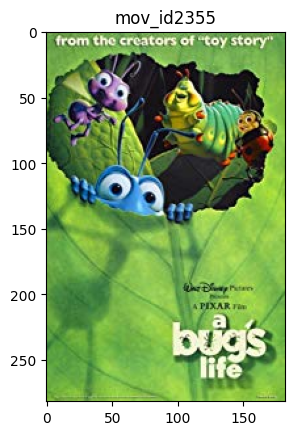

In [13]:
# 海报数据处理
from PIL import Image
import matplotlib.pyplot as plt
import os

# 使用海报和不使用海报的文件路径不同，处理方式相同
use_poster = True
if use_poster:
    rating_path = r'.\work\ml-1m\new_rating.txt'
else:
    rating_path = r'.\work\ml-1m\ratings.dat'

with open(rating_path, 'r') as f:
    data = f.readlines()

# 收集所有电影ID到数组中
movie_ids = []
for item in data:
    movie_id = int(item.strip().split('::')[1])
    movie_ids.append(movie_id)

# 根据id读取海报图像
poster_path = r'.\work\ml-1m\posters'

# 显示电影的id的图像
idx = 1

poster = Image.open(os.path.join(poster_path, 'mov_id{}.jpg'.format(movie_ids[idx])))

plt.figure("Image") # 图像窗口名称
plt.imshow(poster) # 显示图像
plt.axis('on') # 关掉坐标轴为 off
# 设置标题为电影ID
plt.title('mov_id{}'.format(movie_ids[idx]))
plt.show()

In [14]:
# 构建数据读取器
def load_dataset(usr_info, rating_info, movie_info):
    dataset = []
    # 按照rating_info的key遍历
    for user_id in rating_info.keys():
        # 按照rating_info的value遍历
        for movie_id in rating_info[user_id]:
            # 用户信息
            user = usr_info[user_id]
            # 电影信息
            movie = movie_info[movie_id]
            # 评分
            rating = rating_info[user_id][movie_id]
            # 保存数据
            dataset.append({
                'usr_info': user,
                'movie_info': movie,
                'rating': rating,
            })
    return dataset

# 读取数据
dataset = load_dataset(usr_info, rating_info, movie_info)
print('dataset size: ', len(dataset))
print('dataset[0]: ', dataset[0])


dataset size:  1000209
dataset[0]:  {'usr_info': {'usr_id': 1, 'gender': 1, 'age': 1, 'job': 10}, 'movie_info': {'movie_id': 1193, 'movie_name': [1146, 2076, 709, 12, 2077, 2078, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'movie_year': '1975', 'movie_type': [7, 0, 0, 0, 0, 0]}, 'rating': 5}


In [15]:
# 构建数据类Dataset
import numpy as np
from paddle.io import Dataset

class RandomDataset(Dataset):
    def __init__(self, num_samples):
        self.num_samples = num_samples
    
    def __getitem__(self, idx):
        image = np.random.random([784]).astype('float32')
        label = np.random.randint(0, 9, (1, )).astype('int64')
        return image, label
    
    def __len__(self):
        return self.num_samples

In [19]:
# 按照9：1划分训练和验证数据集
def split_dataset(dataset, ratio=0.9):
    # 训练数据集大小
    train_size = int(len(dataset) * ratio)
    # 训练数据集
    train_dataset = dataset[:train_size]
    # 验证数据集
    valid_dataset = dataset[train_size:]
    return train_dataset, valid_dataset

# 划分数据集
train_dataset, valid_dataset = split_dataset(dataset)
print('train_dataset size: ', len(train_dataset))
print('valid_dataset size: ', len(valid_dataset))
# 打印总数量
print('total size: ', len(train_dataset) + len(valid_dataset))

train_dataset size:  900188
valid_dataset size:  100021
total size:  1000209


In [20]:
# 构建DataLoader
from paddle.io import DataLoader

class MovieDataset(Dataset):
    def __init__(self, dataset, use_poster, poster_path=None):
        self.dataset = dataset
        self.use_poster = use_poster
        self.poster_path = poster_path
    
    def __getitem__(self, idx):
        # 数据转换成numpy数组
        usr_id = np.array(self.dataset[idx]['usr_info']['usr_id'])
        usr_age = np.array(self.dataset[idx]['usr_info']['age'])
        usr_gender = np.array(self.dataset[idx]['usr_info']['gender'])
        usr_job = np.array(self.dataset[idx]['usr_info']['job'])
        movie_id = np.array(self.dataset[idx]['movie_info']['movie_id'])
        movie_categories = np.array(self.dataset[idx]['movie_info']['movie_type'])
        movie_title = np.array(self.dataset[idx]['movie_info']['movie_name'])
        score = np.array(self.dataset[idx]['rating'], dtype='float32')
        if(self.use_poster):
            # 不使用图像特征时，不读取图像数据，加速数据读取速度
            poster = Image.open(os.path.join(self.poster_path, 'mov_id{}.jpg'.format(str(movie_id))))
            poster = poster.resize([64, 64])
            if len(poster.size) <= 2:
                # 将灰度图转换成RGB图
                poster = poster.convert("RGB")
            poster = np.array(poster)/127.5 - 1
        else:
            poster = np.array([0.])

        return[usr_id, usr_gender, usr_age, usr_job], [movie_id, movie_categories, movie_title, poster], score
    
    def __len__(self):
        return len(self.dataset)
    
use_poster = False
# 设置battch大小
BATC_SIZE = 256
# 构建train数据集
train_dataset = MovieDataset(train_dataset, use_poster)
# 构建train数据集的DataLoader
train_loader = DataLoader(train_dataset, batch_size=BATC_SIZE, shuffle=True)
# 打印train数据集大小
print('train_loader length: ', len(train_loader))
# 打印train数据集第一个batch的数据
print('train_dataset[0]: ', train_dataset[0])

# 构建valid数据集
valid_dataset = MovieDataset(valid_dataset, use_poster)
# 构建valid数据集的DataLoader
valid_loader = DataLoader(valid_dataset, batch_size=BATC_SIZE, shuffle=False)
# 打印valid数据集大小
print('valid_loader length: ', len(valid_loader))
# 打印valid数据集第一个batch的数据
print('valid_dataset[0]: ', valid_dataset[0])


train_loader length:  3517
train_dataset[0]:  ([array(1), array(1), array(1), array(10)], [array(1193), array([7, 0, 0, 0, 0, 0]), array([1146, 2076,  709,   12, 2077, 2078,    0,    0,    0,    0,    0,
          0,    0,    0,    0]), array([0.])], array(5., dtype=float32))
valid_loader length:  391
valid_dataset[0]:  ([array(5443), array(0), array(25), array(12)], [array(1954), array([8, 7, 0, 0, 0, 0]), array([2952,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0]), array([0.])], array(3., dtype=float32))


In [21]:
for idx, data in enumerate(train_loader):
    usr_data, movie_data, scores = data
    usr_id_arr, usr_gender_arr, usr_age_arr, usr_job_arr = usr_data
    movie_id_arr, movie_categories_arr, movie_title_arr, poster_arr = movie_data
    print('usr_id_arr size: ', usr_id_arr.shape)
    print('moive_id_arr size: ', movie_id_arr.shape)
    print('movie_genres_arr size: ', movie_categories_arr.shape)
    print('movie_title_arr size: ', movie_title_arr.shape)
    print('poster_arr size: ', poster_arr.shape)
    break

usr_id_arr size:  [256]
moive_id_arr size:  [256]
movie_genres_arr size:  [256, 6]
movie_title_arr size:  [256, 15]
poster_arr size:  [256, 1]


# 数据处理总结

总结一下吧，这是一个推荐系统的数据处理，三个数据集，分别是用户信息。电影信息和评论信息，从一开始的时候三个数据集的处理套路其实是一样的：
- 数据引入
- 查看原始数据
- 将原始数据的信息进行编码
- 转化为字典
- 再将其中的字符信息转换为数字序列（这个其实是有迭代。他自己做一个序列，每一个序列序列号对应一个单词）

这里面其实有一个问题是如何分词，英文很简单，单词之间的空格很好进行分词。但是中文不一定。

而这一次我用的是GitHub的copilot来辅助做整个数据处理任务，不得不说它有些东西确实不太能理解，可能是因为中文的原因，但是大部分你只要在copilot上面进行小范围的更改，而且它们串联着上下文的代码告诉我上下文代码是如何处理的。

这个数据集你想做一个什么样模型，你就要对数据集的关键信息进行采集转化，最后再用paddle的dataset和dataloader去加载数据集和数据迭代。

具体到每个任务来说都会有不同的地方，大部分都是这个过程，分别是数据整理、数据融合、数据迭代。

# 模型介绍
神经网络模型设计是电影推荐任务中重要的一环。它的作用是提取图像、文本或者语音的特征，利用这些特征完成分类、检测、文本分析等任务。在电影推荐任务中，我们将设计一个神经网络模型，提取用户数据、电影数据的特征向量，然后计算这些向量的相似度，利用相似度的大小去完成推荐。

实现思路：
1. 分别将用户、电影的多个特征数据转换成特征向量。
2. 对这些特征向量，使用全连接层或者卷积层进一步提取特征。
3. 将用户、电影多个数据的特征向量融合成一个向量表示，方便进行相似度计算。
4. 计算特征之间的相似度。

该网络结构包含如下内容：

1. 提取用户特征和电影特征作为神经网络的输入，其中：
	* 用户特征包含四个属性信息，分别是用户ID、性别、职业和年龄。
	* 电影特征包含三个属性信息，分别是电影ID、电影类型和电影名称。

2. 提取用户特征。使用Embedding层将用户ID映射为向量表示，输入全连接层，并对其他三个属性也做类似的处理。然后将四个属性的特征分别全连接并相加。

3. 提取电影特征。将电影ID和电影类型映射为向量表示，输入全连接层，电影名字用文本卷积神经网络得到其定长向量表示。然后将三个属性的特征表示分别全连接并相加。

4. 得到用户和电影的向量表示后，计算二者的余弦相似度。最后，用该相似度和用户真实评分的均方差作为该回归模型的损失函数。
><font size=2>衡量相似度的计算有多种方式，比如计算余弦相似度、皮尔森相关系数、Jaccard相似系数等等，或者通过计算欧几里得距离、曼哈顿距离、明可夫斯基距离等方式计算相似度。余弦相似度是一种简单好用的向量相似度计算方式，通过计算向量之间的夹角余弦值来评估他们的相似度，本节我们使用余弦相似度计算特征之间的相似度。</font>

In [22]:
# 使用词嵌入（Embedding）的方式可将数字转变成向量
import paddle
from paddle.nn import Embedding, Linear, Conv2D
import numpy as np
import paddle.nn.functional as F

# 声明用户的最大ID，加1是因为有0这个ID
USR_ID_NUM = 6040 + 1
# 声明Embedding层，大小为32
usr_emb = Embedding(num_embeddings=USR_ID_NUM, embedding_dim=32, sparse=False)
# 声明输入数据，转化为tensor
arr_1 = np.array([1], dtype='int64').reshape(-1)
print('arr_1', arr_1)
arr_pd1 = paddle.to_tensor(arr_1)
print('arr_pd1', arr_pd1)
# 计算结果
emb_res = usr_emb(arr_pd1)
# 打印结果
print('数字1的embdding结果为：', emb_res.numpy(), '\n形状是：', emb_res.shape)


arr_1 [1]
arr_pd1 Tensor(shape=[1], dtype=int64, place=Place(cpu), stop_gradient=True,
       [1])
数字1的embdding结果为： [[-0.00290883 -0.00655583 -0.02989184 -0.00692638 -0.01836955  0.00815187
   0.01424625 -0.01597247  0.01770836 -0.03134339 -0.018773   -0.00474371
   0.00706341  0.01632679 -0.00775298 -0.02570937 -0.01610127  0.01605481
   0.02708567  0.00539753 -0.00056279  0.02627761 -0.02444202 -0.02867896
  -0.01037696 -0.0045035   0.03126198  0.0033323   0.01482252  0.01022259
   0.00727551 -0.00179067]] 
形状是： [1, 32]


In [24]:
# 声明用户的最大ID，加1是因为有0这个ID
USR_ID_NUM = 10
# 声明Embedding层，大小为16
usr_emb = Embedding(num_embeddings=USR_ID_NUM, embedding_dim=16, sparse=False)
# 声明输入数据，转化为tensor
arr = np.random.randint(0, 10, (3)).reshape((-1)).astype('int64')
print('arr', arr)
arr_pd = paddle.to_tensor(arr)
print('arr_pd', arr_pd)
# 计算结果
emb_res = usr_emb(arr_pd)
print('默认权重初始化embedding结果为：', emb_res.numpy(), '\n形状是：', emb_res.shape)

# 观察Embedding层的权重
emb_weight = usr_emb.state_dict()
print(emb_weight.keys())
print('embedding层权重初始化的形状为：', emb_weight['weight'].shape)

# 使用KaimingNormal初始化Embedding层的权重
init = paddle.nn.initializer.KaimingNormal()
param_attr = paddle.ParamAttr(initializer=init)
usr_emb2 = Embedding(num_embeddings=USR_ID_NUM, embedding_dim=16, weight_attr=param_attr)
emb_res = usr_emb2(arr_pd)
print('权重初始化后的embedding结果为：', emb_res.numpy(), '\n形状是：', emb_res.shape)

arr [7 7 6]
arr_pd Tensor(shape=[3], dtype=int64, place=Place(cpu), stop_gradient=True,
       [7, 7, 6])
默认权重初始化embedding结果为： [[-0.20579726  0.4500755   0.1699689   0.04077518  0.32013     0.09697235
  -0.0881387   0.40381348  0.02106494 -0.3921072   0.0171406   0.44277185
  -0.230511   -0.25974736  0.09552592 -0.03317448]
 [-0.20579726  0.4500755   0.1699689   0.04077518  0.32013     0.09697235
  -0.0881387   0.40381348  0.02106494 -0.3921072   0.0171406   0.44277185
  -0.230511   -0.25974736  0.09552592 -0.03317448]
 [ 0.21414822 -0.30561435 -0.3652408  -0.16181561 -0.41897663 -0.15155533
   0.24789351  0.18698877 -0.3813553   0.3027087   0.03420514 -0.3806372
   0.37744063 -0.40015486  0.10363263  0.3979153 ]] 
形状是： [3, 16]
odict_keys(['weight'])
embedding层权重初始化的形状为： [10, 16]
权重初始化后的embedding结果为： [[ 0.65643984  0.22854336  0.01091314  0.21779285 -0.36527684  0.1615428
  -0.2847911  -0.0517263   0.27291426  0.40635797 -0.12964375  0.15632248
  -0.31246507 -0.7086492  -0.33846667  0.